#  <span style='color:#4B0082'>  Open CV event callbacks <span/>

In OpenCV, events are crucial in the development of interactive programs that respond to user input. Events can be triggered by mouse movement, mouse clicks, key presses, etc.By handling these events, developers can create dynamic interfaces that enhance user experience in image and video processing tasks.
###  <span style='color:#575757'> Common Events in OpenCV<span/>

#### <span style='color:#553edf'> 1.Mouse Events<span/>

• Mouse Click: Occurs when the user presses the mouse button. It can be further categorized into different types, such       as left-click, right-click.<br/>
• Mouse Move: Occurs whenever the mouse is moved within the window.<br/>
• Mouse Wheel: Occurs when the user rolls the mouse wheel.

Some of the most significant mouse events are:
    
• cv2.EVENT_LBUTTONDOWN: Indicates that the left mouse button was clicked.<br/>
• cv2.EVENT_RBUTTONDOWN: Indicates that the right mouse button was clicked.<br/>
• cv2.EVENT_MOUSEMOVE: Fires on movement of the mouse within the window.<br/>
• cv2.EVENT_MOUSEWHEEL: Fires on movement of the mouse wheel.
    

#### <span style='color:#553edf'> 2. Keyboard Events:<span/> 
• They occur whenever a key is pressed or released while the window is open. They are also very useful to handle            various functionalities within an application.

#### <span style='color:#553edf'> 3. Trackbar Events:<span/>
• Trackbars (sliders) allow users to adjust parameters during runtime. Trackbars can be linked with image processing routines for instant feedback after user input.

### <span style='color:#575757'> Practical Uses of Events in Image or Video Processing<span/>
#### <span style='color:#553edf'> 1. Image Annotation:<span/>
    
• The users can click on specific points in an image to mark features or objects such that it is easier to label regions of interest or create labels for machine learning datasets.
#### <span style='color:#553edf'> 2. Interactive Image Cropping<span/>
    
• Users can define a rectangular area to crop from an image using mouse click and drag events. It offers precise area selection without manually entering coordinates.
#### <span style='color:#553edf'> 3. Object Tracking:<span/>
    
• Users can select an object within a video frame using mouse events, which can further be used to start tracking algorithms that follow the object over frames.
#### <span style='color:#553edf'> 4. Parameter Tuning:<span/>

• Trackbars are very useful for real-time parameter tuning like brightness, contrast, or color thresholds. Users can see the effect of changes instantly on the image or video, and it makes decisions easier.
#### <span style='color:#553edf'> 5. Real-Time Effects and Filters:<span/>

• Mouse and keyboard events can be utilized to apply filters or effects to images and videos so that users can explore creative possibilities interactively.
#### <span style='color:#553edf'> 6. Uses of Drawing and Painting:<span/>

• Users can simply draw on videos or images utilizing mouse events. This can be utilized to create artwork or in creating visual notes on images.

#### <span style='color:#553edf'> 7. Construction of User Interface:<span/>

   • Events play an important role in constructing interactive user interfaces such that users can scroll menus, select options, and control playback in video processing tools.
Thanks to such events, programmers are able to create intelligent and interactive programs that utilize all the capabilities of OpenCV in computer vision.

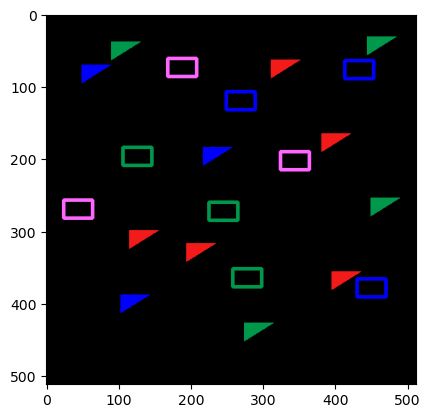

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)

color = (255,102,255)
#shape=True
shape=1
# mouse callback function
def draw_shape(event,x,y,flags,param):
     
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        point1 = (x, y)
        point2 = (x+40,y)
        point3 = (x,y+25)
        point4 = (x+40,y+25)
        
        if shape==1:
             cv2.rectangle(img, point1, point4, color, 3)
        else:
            # Create an array of points for the triangle
            triangle_points = np.array([point1, point2, point3], np.int32)
            # Draw the filled triangle on the image
            cv2.fillPoly(img, [triangle_points], color)
        
        


cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_shape)

while True:
    
    cv2.imshow('image',img)
    
    k = cv2.waitKey(1) & 0xFF
    if k == ord('b'):
        color = (255,0,0)
    elif k==ord('g'):
        color = (76,153,0)
    elif k==ord('r'):
        color = (26,26,243)
    elif k ==ord('s') : 
        shape=not shape
    elif k == 27:
        break
        
cv2.destroyAllWindows()

plt.imshow(img[...,::-1])

Suppose you have a camera from an overhead angle of a parking lot and you decide to check if the parking spaces are full or empty. The coordinates of the parking spaces can be obtained and saved interactively using a frame from the video and by clicking on the parking space.
 

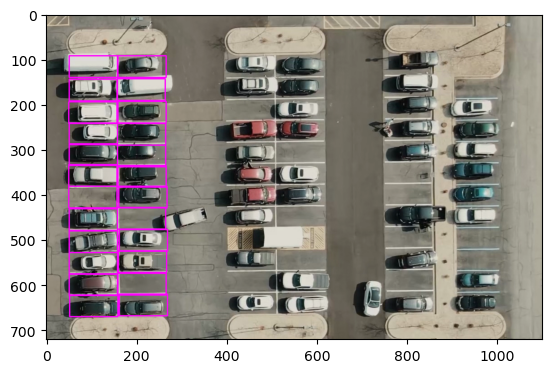

In [8]:
import cv2
import pickle
import matplotlib.pyplot as plt

width, height = 107, 48

#try:
#    with open('CarParkPos', 'rb') as f:
#        posList = pickle.load(f)
#except:
#    posList = []

posList = []

def mouseClick(events, x, y, flags, params):
    if events == cv2.EVENT_LBUTTONDOWN:
        posList.append((x, y))
    if events == cv2.EVENT_RBUTTONDOWN:
        for i, pos in enumerate(posList):
            x1, y1 = pos
            if x1 < x < x1 + width and y1 < y < y1 + height:
                posList.pop(i)

   # with open('CarParkPos', 'wb') as f:
   #     pickle.dump(posList, f)


while True:
    img = cv2.imread('carParkImg.png')
       
    for pos in posList:
        cv2.rectangle( img, pos, (pos[0] + width, pos[1] + height), (255, 0, 255), 2)

    cv2.imshow("Image",  img)
    cv2.setMouseCallback("Image", mouseClick)
    
    k = cv2.waitKey(1) & 0xFF
    if k == ord('q'):
        break

cv2.destroyAllWindows()

plt.imshow( img[...,::-1])
